- https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook

## 1. Introduction
## 2. Reading data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.4.2
numpy version: 1.21.5
seaborn version: 0.11.2


In [2]:
mall_data = pd.read_csv('/Users/jaewon/Downloads/ESAA/Mall_Customers.csv')
print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [3]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
25,26,Male,29,28,82
138,139,Male,19,74,10
112,113,Female,38,64,42
14,15,Male,37,20,13
60,61,Male,70,46,56
97,98,Female,27,60,50
187,188,Male,28,101,68
6,7,Female,35,18,6
37,38,Female,30,34,73
151,152,Male,39,78,88


In [5]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


- 5 columns
1. Customer ID - numerical - integer
2. Gender - categorical - binary
3. Age - numerical - integer
4. Annual Income - numerical - integer
5. Spending Score - numerical - integer

- 바이너리 변수의 원핫인코딩 지양 -> https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided

In [6]:
mall_data.isnull().sum() # 결측치 없음

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 3. Exploratory Data Analysis

### 3.1 Distributions

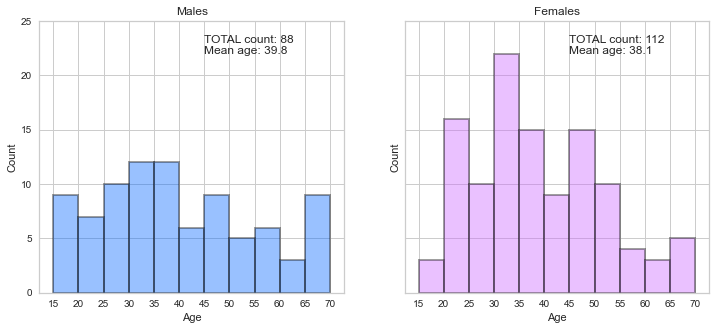

In [10]:
import warnings
(warnings.filterwarnings('ignore'))

males_age = mall_data[mall_data['Gender']=='Male']['Age'] 
females_age = mall_data[mall_data['Gender']=='Female']['Age']

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

In [13]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


- male 평균 연령대가 조금 더 높고 uniform 분포에 가까움
- Kolgomorov-Smirnov test 결과 : 두 그룹간 차이가 통계적으로 유의하지 않음

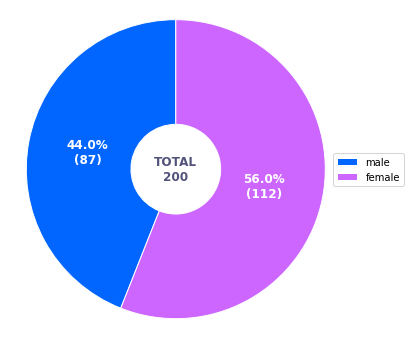

In [17]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] 

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

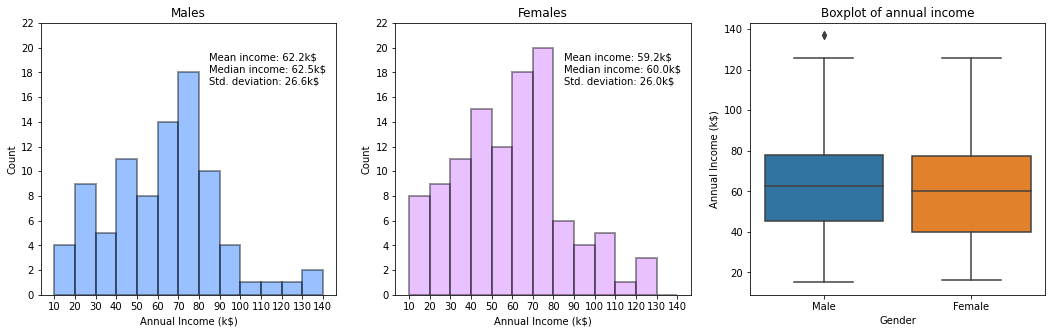

In [18]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # 남성의 연간소득 
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # 여성의 연간소득 

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

In [19]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


- male 평균 및 중위 소득이 더 높고 분산은 비슷함
- male 집단에 이상치 존재
- Kolgomorov-Smirnov test 결과 : 두 그룹간 차이가 통계적으로 유의하지 않음

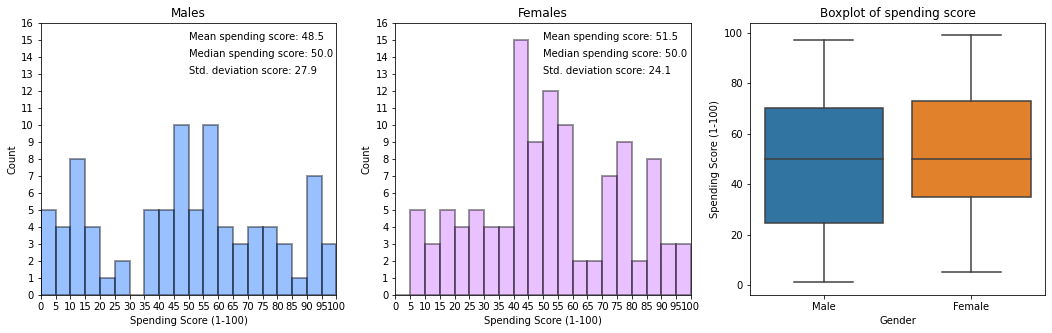

In [20]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # 남성의 소비점수
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # 여성의 소비점수

spending_bins = range(0,105,5)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

# females histogram
sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()

plt.show()

In [21]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


- female의 평균 및 중위 소득이 더 높음
- Kolgomorov-Smirnov test 결과 : 영가설 (두 그룹간 차이가 없음)을 기각할 증거가 없지만 이전 비교만큼 통계적 유의성이 강력하지 않음

In [22]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median() # 연령별 중위수 추출
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

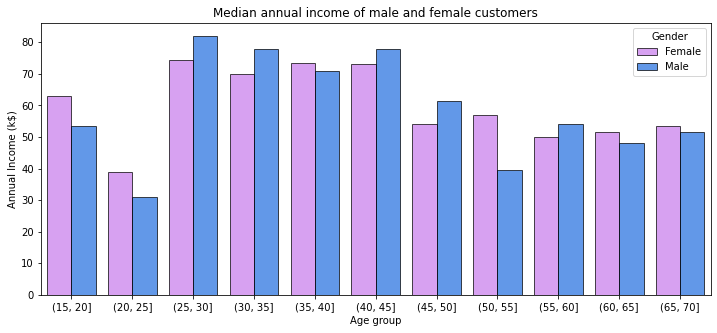

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group, # 연령별 연간소득의 중위수 
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

- 소득이 높은 고객은 25~45세
- 성별간 차이가 큰 부분 : 25~30세에서 남성이 더 부유, 50~55세에서 여성이 더 부유함

### 3.2 Correlations

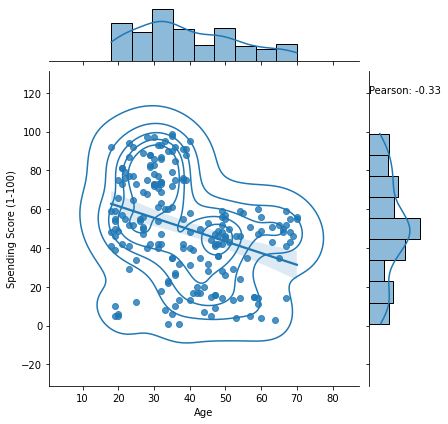

In [24]:
from scipy.stats import pearsonr

# Pearson's correlation (Age & Spending Score)
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=mall_data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

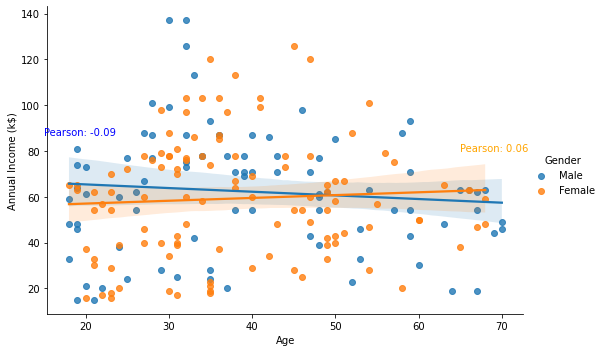

In [25]:
# Pearson's correlations (Age & Annual income)
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age', 'Annual Income (k$)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

- 미미한 수준의 상관관계

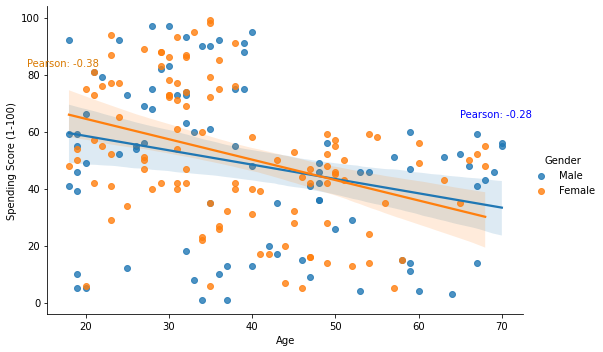

In [26]:
# Pearson's correlations (Age & Spending Score)
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age', 'Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

- 남성 여성 모두 약한 음의 상관관계 (<0.5)

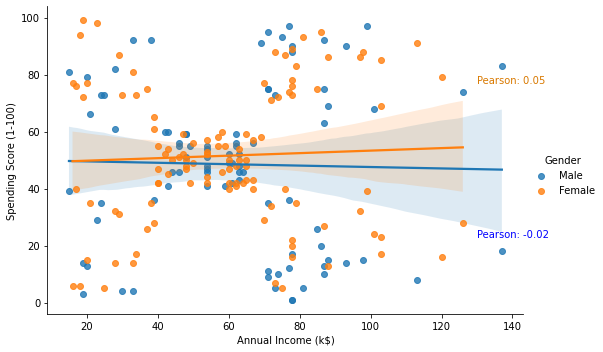

In [27]:
# Pearson's correlations (Annual income & Spending Score)
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

- 미미한 수준의 상관관계

## 4. Clustering
* K-Means
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
* Affinity Propagation.

- 표준화가 필요한 경우 : https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering

### 4.1 K-Means
### 4.1.1 Description


- 샘플을 initial group으로 분할 (seed point에서 가까운 샘플들끼리 클러스터 형성)
- 그룹의 centroids까지의 거리를 구해 가까운 샘플들끼리 클러스터 생성
- 업데이트된 클러스터의 centroids 계산
- 2, 3번째 스텝 반복으로 inertia를 최소화하는 것이 목적

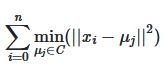

- 파라미터
1. **Initialisation criteria** 
 - 사이킷런에서는 k-means++ 사용 : 더 좋은 결과의 확률을 높이기 위해 서로 멀리 떨어진 centroids 생성

2. **Number of clusters**  
 - 정해진 기준이 없으며 elbow method, silhouette score를 주로 사용함
 - 그외 사이킷런에서 제공하지 않는 다른 옵션들 
 
    * Minimum Message Length (MML) (https://en.wikipedia.org/wiki/Minimum_message_length)
    * Minimum Description Length (MDL) (https://en.wikipedia.org/wiki/Minimum_description_length)
    * Bayes Information Criterion (BIC) (https://en.wikipedia.org/wiki/Bayesian_information_criterion)
    * Akaike Information Criterion (AIC) (https://en.wikipedia.org/wiki/Akaike_information_criterion)
    * Dirichlet Process
    * Gap statistic

3. **A distance metric (사이킷런에서는 필요 없음)**
 - 가장 많이 쓰는 것은 유클리디안 걱리 - 다차원적 분석에서 거리가 급증함 (curse of dimensionality)
 - 사이킷런에서는 쓰이지 않지만 다른 거리 옵션들
    * Mahalonobis distance (high computiational cost)
    * Itakura-Saito distance
    * L1 distance
    * Cosine distance
    * Bregman distance

### 4.1.2 Use case - customers segmentation

In [33]:
from sklearn.cluster import KMeans 

In [34]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # 수치형 변수만

In order to find an appropriate number of clusters, the elbow method will be used. In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. The rule is to choose the number of clusters where you see a kink or "an elbow" in the graph.

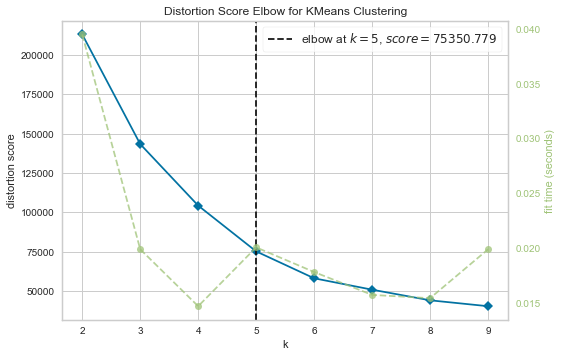

In [35]:
# elbow method
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

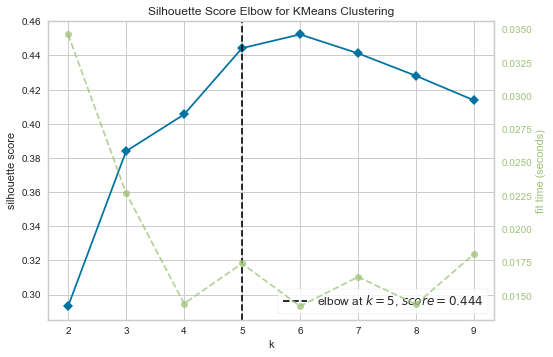

In [36]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

- 군집 5, 6개 비교
#### 5 clusters

In [37]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) 

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # 레이블 부여

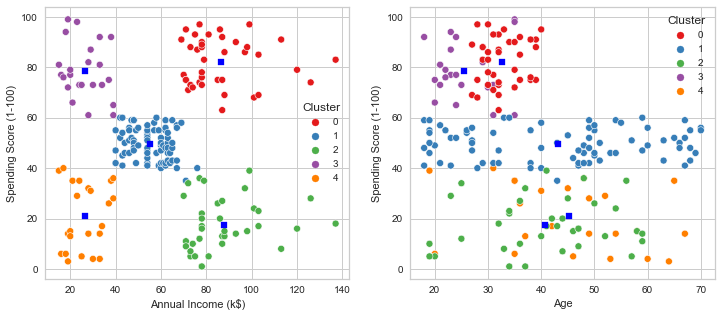

In [38]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# centroid 표시
axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

5개 군집 생성
1. low annual income and high spending score
2. medium annual income and medium spending score
3. high annual income and low spending score
4. high annual income and high spending score
5. low annual income and low spending score

- age를 구분하는 명확한 군집은 없음

In [39]:
# cluster size
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,79
2,36
3,23
4,23


- 가장 큰 군집 79개
- 23개의 작은 군집 2개

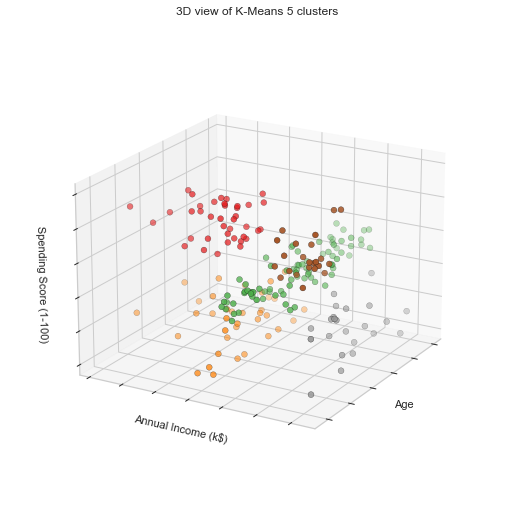

In [41]:
# 3D projection (spyder에서 rotate 가능)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

In [42]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

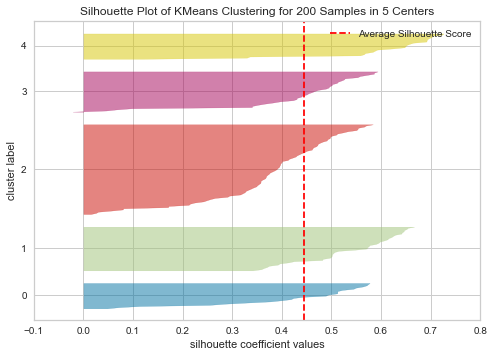

In [43]:
# 실루엣 다이어그램
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

#### 6 clusters

In [44]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

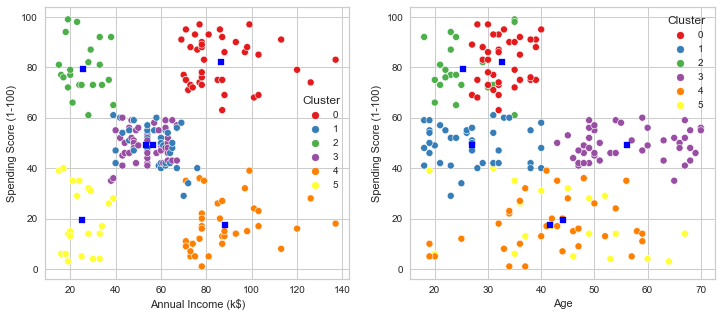

In [45]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

- 6 clusters todtjd
1. younger, medium annual and medium spending score
2. high annual income and low spending score
3. medium annual income and medium spending score
4. high annual income and high spending score
5. low annual income and low spending score
6. low annual income and high spending score

In [46]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,39
1,38
2,22
3,45
4,35
5,21


In [47]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

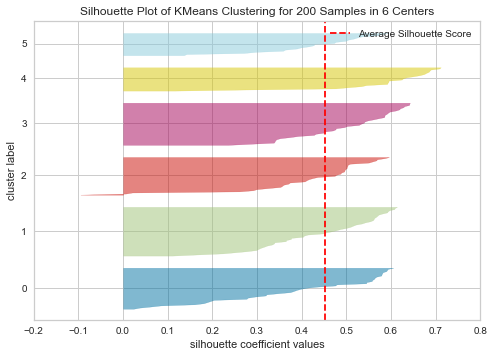

In [48]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

### 4.2 DBSCAN

### 4.2.1 Description

- Density-Based Spatial Clustering of Applications with Noise 
- https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf?source=post_page
- concept of dense regions 기반
- 파라미터
    * Eps, ε  - distance
    * MinPts – Minimum number of points within distance Eps  
- 거리는 보통 유클리디언 사용

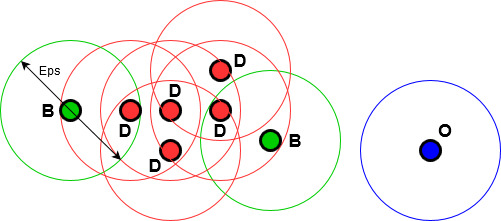
 - 빨간색 : in dense region
 - 초록색 : border ones
 - 파란색 : outliers

- 장점
 * 파라미터 기반으로 군집수 직접 도출
 * convex 형태가 아니어도 군집화 가능
 * 이상치 탐지

- 단점
 - 계산복잡도가 큼
 - 밀도가 다양한 군집의 처리에 약함

### 4.2.2 Use case - customers segmentation

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values 
min_samples = np.arange(3,10) # min_samples values 

DBSCAN_params = list(product(eps_values, min_samples))

In [51]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

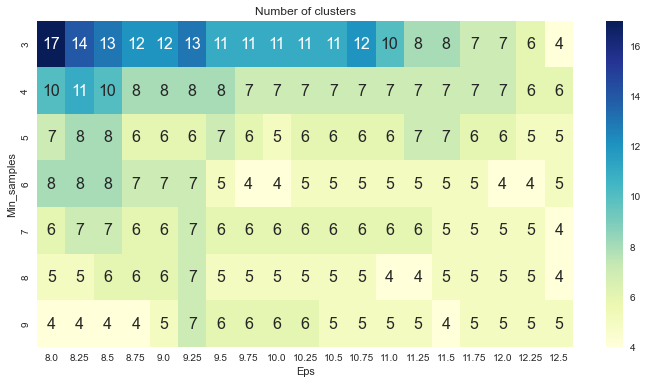

In [52]:
# 각 파라미터 조합에 따른 생성군집개수
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

- 대부분 4-7 개 생성 

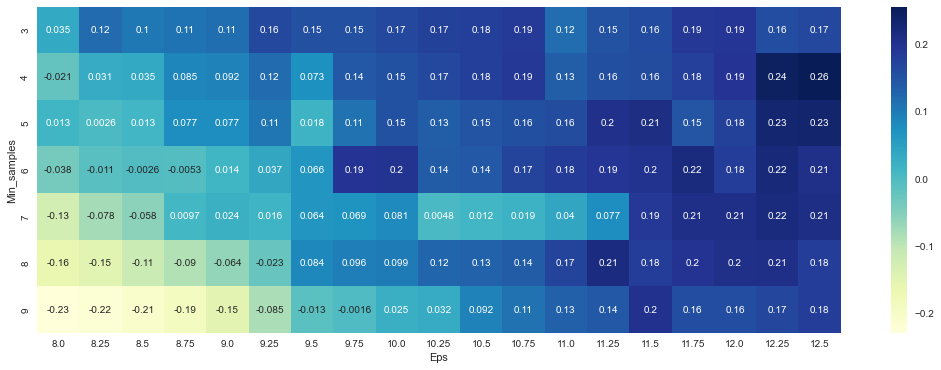

In [53]:
# 각 파라미터 조합별 silhuette score
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

- 최적값 (Global maximum) : 0.26, eps=12.5, min_samples=4.

In [54]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # 레이블 부여

In [55]:
# 클러스터 사이즈
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


- 이상치 18개
- 사이즈 다양하게 분포 (어떤 군집은 4개)

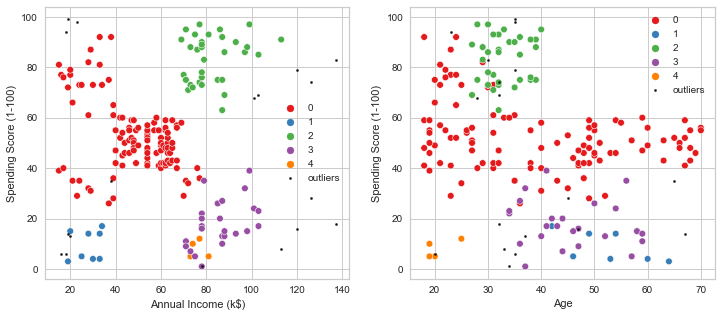

In [56]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

### 4.3 Affinity Propagation

### 4.3.1 Description

- concept of sending messages between a pair of points until it converges
- 두 point가 서로 얼마나 닮았는지, 서로의 exemplar가 될 수 있는지를 측정하는 방식
- 최적의 군집개수를 스스로 찾음 
- 높은 계산복잡도 : O(n²T), n is the number of samples, T is the number of iterations until convergence
- initialization에 대한 민감도가 낮음

- 파라미터
1. Preference which is a negative number and controls how many exemplars are used
2. Damping factor which prevents numerical oscillations when updating messages

### 4.3.2 Use case - customers segmentation

In [57]:
from sklearn.cluster import AffinityPropagation

In [63]:
no_of_clusters = []
preferences = range(-20000,-5000,200) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

,preference,clusters,sil_score
41,-11800.0,6.0,0.451649
63,-7400.0,6.0,0.451440
26,-14800.0,6.0,0.451440
46,-10800.0,6.0,0.451440
14,-17200.0,6.0,0.451440


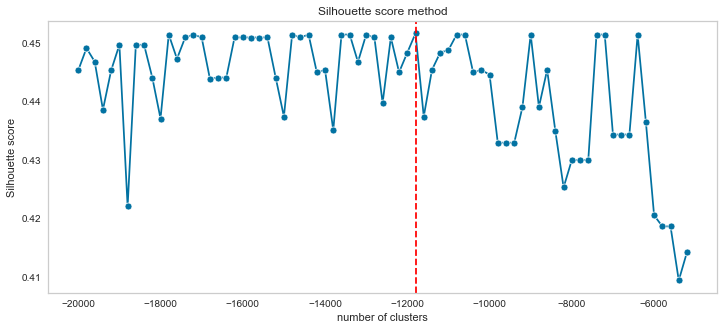

In [64]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(preferences, af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [65]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [66]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # 레이블 부여

In [67]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


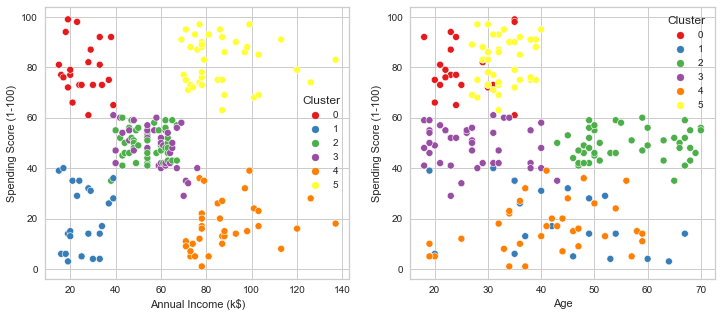

In [68]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot('Age', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

- k-means와 유사하게 상대적으로 비슷한 크기의 군집 생성

## 5. Comparison and discussion 

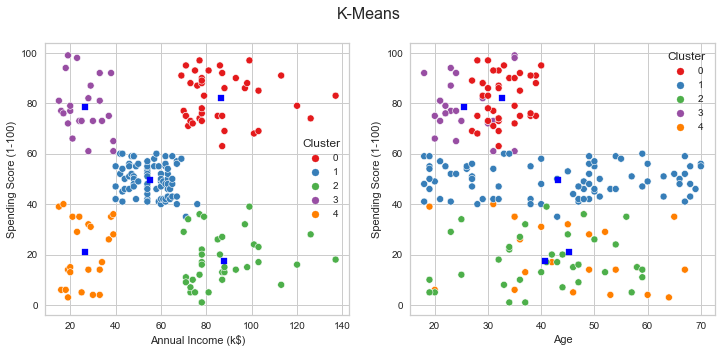

In [69]:
fig1.suptitle('K-Means', fontsize=16)
fig1

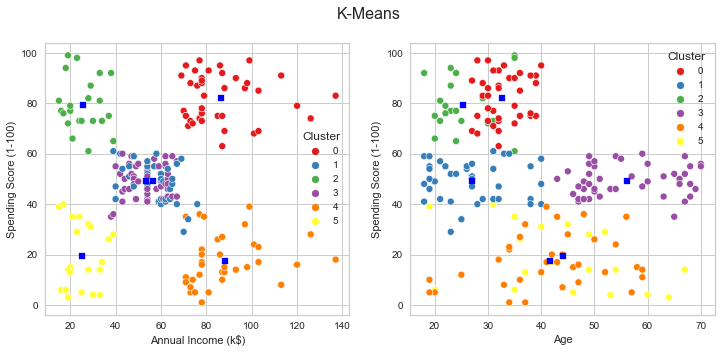

In [70]:
fig11.suptitle('K-Means', fontsize=16)
fig11

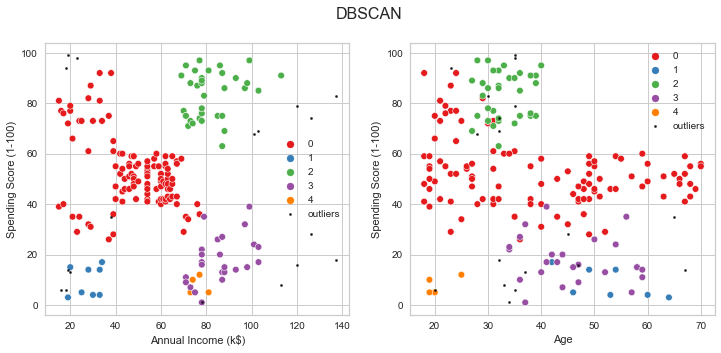

In [71]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

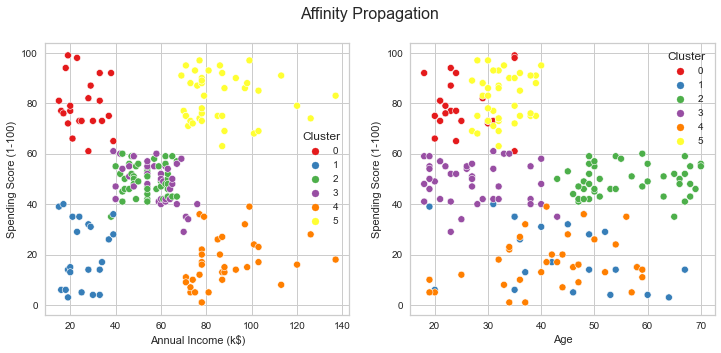

In [72]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

In [73]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,39.0,112.0,22.0
1,38.0,8.0,22.0
2,22.0,34.0,44.0
3,45.0,24.0,39.0
4,35.0,4.0,34.0
5,21.0,NaN,39.0
-1,NaN,18.0,NaN


- 클러스터별 방법론에 따른 크기에 차이 존재

- 비교 결과
 - DBSCAN의 성능이 좋지 않음 (밀도가 다른 군집보다 낮은 경우 군집으로 인지하지 못해 suboptimal result를 도출)
 - K-Means와 affinity propagation은 합리적인 6개의 군집 생성